#Softmax Function:
- It outputs a probability b/w 0 & 1

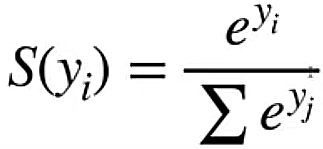

In [1]:
import torch
import torch.nn as nn
import numpy as np

##Using Numpy:

In [2]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis = 0) #axis = 0 means summing column-wise

In [3]:
x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print("softmax numpy: ", outputs)

softmax numpy:  [0.65900114 0.24243297 0.09856589]


##Using PyTorch:

In [5]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim = 0) #built-in function
print("softmax torch: ", outputs)

softmax torch:  tensor([0.6590, 0.2424, 0.0986])


#Cross Entropy Loss:

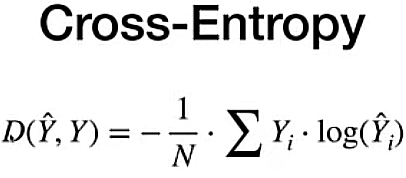

In [6]:
import torch
import torch.nn as nn
import numpy as np

##Using Numpy:

In [7]:
def cross_entropy(actual, predicted):
  loss = -np.sum(actual * np.log(predicted))
  return loss

In [8]:
#Y must be one hot encoded
#For class 0: [1 0 0]
#For class 1: [0 1 0]
#For class 2: [0 0 1]

Y = np.array([1, 0, 0])

In [9]:
#Predicted probabilities:
Y_pred1 = np.array([0.7, 0.2, 0.1])
Y_pred2 = np.array([0.1, 0.3, 0.6])

l1 = cross_entropy(Y, Y_pred1)
l2 = cross_entropy(Y, Y_pred2)

print(f'Loss1 numpy: {l1:.4f}') #Low Loss
print(f'Loss2 numpy: {l2:.4f}') #High Loss

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


##Using PyTorch:

In [10]:
#Using PyTorch
loss = nn.CrossEntropyLoss()
#nn.CrossEntropyLoss applies nn.LogSoftmax + nn.NLLLoss (negative log likelihood loss)
#No need to apply softmax in last layer
#Y has to be class labels and not one-hot encoded
#Y_pred has raw scores(logits), no softmax

In [12]:
Y = torch.tensor([2, 0, 1]) #Class labels for three samples

#size = nsamples * nclasses
#let samples = 3 and nclasses = 3, then
Y_pred1 = torch.tensor([[0.1, 1.0, 2.1],
                        [2.0, 1.0, 0.1],
                        [0.1, 3.0, 0.1]]) #raw scores
Y_pred2 = torch.tensor([[2.1, 1.0, 2.1],
                        [0.1, 1.0, 2.1],
                        [0.1, 3.0, 0.1]]) #raw scores

l1 = loss(Y_pred1, Y)
l2 = loss(Y_pred2, Y)

print(f'Loss1 torch: {l1.item():.4f}') #Low loss
print(f'Loss2 torch: {l2.item():.4f}') #HIgh loss

Loss1 torch: 0.3018
Loss2 torch: 1.1118


In [14]:
#Predictions:

_, predictions1 = torch.max(Y_pred1, 1)
_, predictions2 = torch.max(Y_pred2, 1)

print(f'Prediction1: {predictions1}') #Good prediction
print(f'Prediction2: {predictions2}') #Bad Prediction

Prediction1: tensor([2, 0, 1])
Prediction2: tensor([0, 2, 1])


#NN with Softmax: (Multiclass)

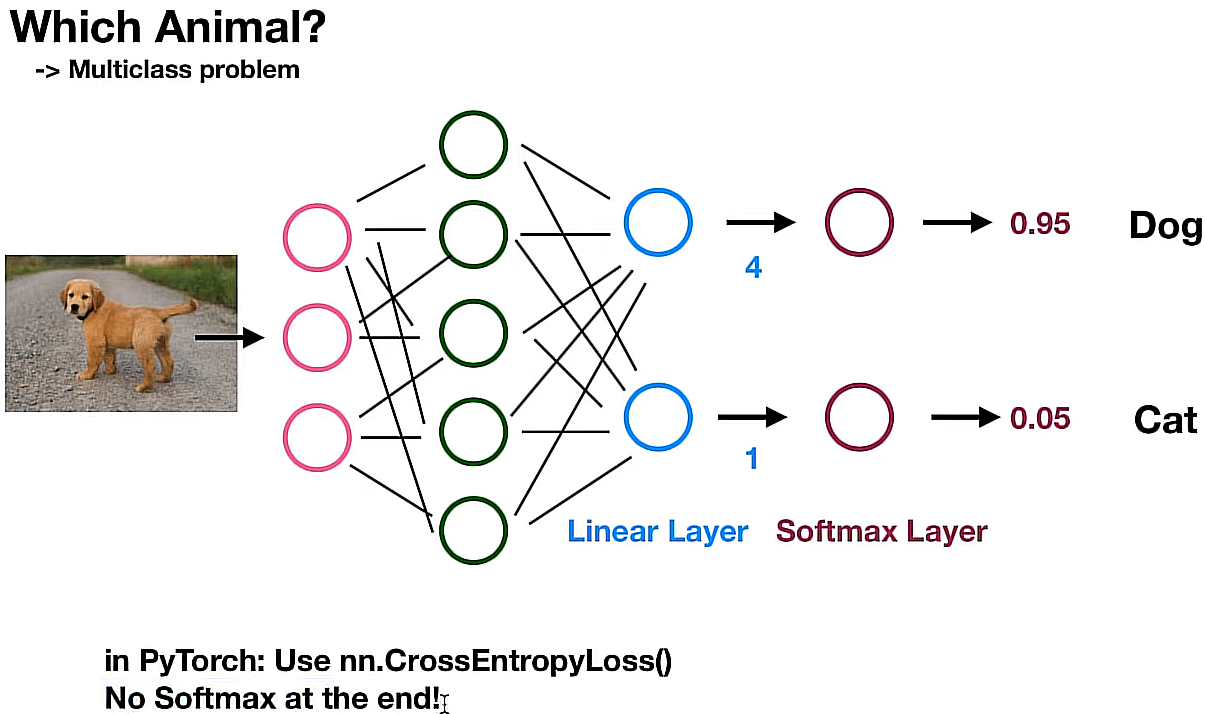

In [15]:
import torch
import torch.nn as nn

In [16]:
class NN(nn.Module):

  def __init__(self, input_size, hidden_size, num_classes):
    super(NN, self).__init__()
    #Layers
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU() #Relu activation function
    self.linear2 = nn.Linear(hidden_size, num_classes)
    #outputs a value for each possible class i.e. output size = no. of classes

  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    #no softmax at the end

    return out

In [17]:
model = NN(input_size=28*28, hidden_size = 5, num_classes = 3)
criterion = nn.CrossEntropyLoss() #applies softmax

#NN with Sigmoid (Binary Class):

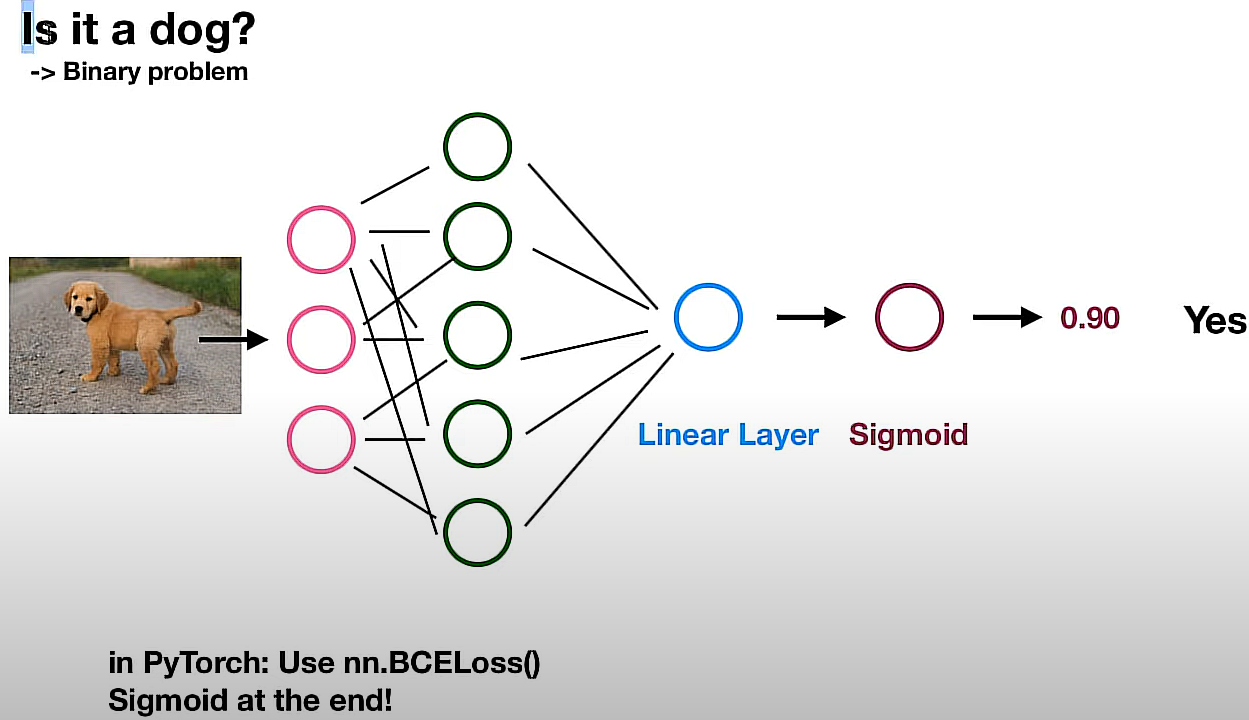

In [18]:
import torch
import torch.nn as nn

In [19]:
class NN(nn.Module):

  def __init__(self, input_size, hidden_size):
    super(NN, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1) #Ouputs only one value

  def forward(self, x):
    out = self.linear1(x)
    out = self.ReLU(out)
    out = self.linear2(out)
    #Sigmoid at the end
    y_pred = torch.sigmoid(out)

    return y_pred

In [20]:
mode = NN(input_size = 28*28, hidden_size = 5)
criterion = nn.BCELoss() #applying binary cross entropy loss